## Método de Ondas Planas

Programa para calcular la estructura de bandas de un cristal
Fotónico 1D por medio del método de ondas planas PWE  
Referencia: Photonics Crystals, Physics and practical modeling  
Igor A. Sukhoivanov and Igor V. Guryev

In [30]:
import numpy as np
import matplotlib.pyplot as plt

l1 = 0.2e-6
l2 = 0.8e-6

eps1 = 1
eps2 = 1

a = l1+l2
numG = 100

G  = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
G1 = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
chi = np.zeros((len(G),len(G1)),dtype = 'complex_')

for i in range(len(G)):
    for J in range(len(G1)):
        if(G[i] - G1[J]) == 0:
            chi[i,J] = 1/(l1+l2) * (1/eps1 * l1 + 1/eps2*l2)
        else:
            chi[i,J] = 1j /(l1+l2)/(G[i]-G1[J]) * ((1/eps1 * (np.exp(-1j * (G[i]-G1[J]) * l1) - 1)) + (1/eps2 * (np.exp(-1j * (G[i]-G1[J]) * (l1+l2)) - np.exp(-1j * (G[i]-G1[J])*l1))))


In [31]:
print(chi)
print(chi.shape)

[[ 1.00000000e+00+0.j -2.57978324e-15+0.j -2.57978324e-15+0.j ...
  -2.69683411e-15+0.j -2.70052652e-15+0.j -2.52233436e-15+0.j]
 [-2.57978324e-15+0.j  1.00000000e+00+0.j -2.57978324e-15+0.j ...
  -2.69301387e-15+0.j -2.69683411e-15+0.j -2.51776064e-15+0.j]
 [-2.57978324e-15+0.j -2.57978324e-15+0.j  1.00000000e+00+0.j ...
  -2.68926272e-15+0.j -2.69301387e-15+0.j -2.51314049e-15+0.j]
 ...
 [-2.69683411e-15+0.j -2.69301387e-15+0.j -2.68926272e-15+0.j ...
   1.00000000e+00+0.j  1.63621869e-14-0.j  1.63621869e-14-0.j]
 [-2.70052652e-15+0.j -2.69683411e-15+0.j -2.69301387e-15+0.j ...
   1.63621869e-14+0.j  1.00000000e+00+0.j  1.63621869e-14-0.j]
 [-2.52233436e-15+0.j -2.51776064e-15+0.j -2.51314049e-15+0.j ...
   1.63621869e-14+0.j  1.63621869e-14+0.j  1.00000000e+00+0.j]]
(200, 200)


In [32]:
M = np.zeros((len(G),len(G1)),dtype = 'complex_')
ks = np.linspace(-2*np.pi/a, 2*np.pi/a,100)
Ks = list()
dispe = list()


In [33]:
for k in range(len(ks)):
    for i in range(len(G)):
        for j in range(len(G1)):
            M[j,i] = chi[j,i] * (ks[k] + G1[j]) * (ks[k] + G[i])
    V = np.linalg.eig(M)[0]
    dispe.append(np.sqrt(np.sort(np.abs(V))) * a/2/np.pi)
    Ks.append(ks[k] * a/np.pi)




In [34]:
print(dispe[0])

[3.37340464e-07 1.00000000e+00 1.00000000e+00 2.00000000e+00
 2.00000000e+00 3.00000000e+00 3.00000000e+00 4.00000000e+00
 4.00000000e+00 5.00000000e+00 5.00000000e+00 6.00000000e+00
 6.00000000e+00 7.00000000e+00 7.00000000e+00 8.00000000e+00
 8.00000000e+00 9.00000000e+00 9.00000000e+00 1.00000000e+01
 1.00000000e+01 1.10000000e+01 1.10000000e+01 1.20000000e+01
 1.20000000e+01 1.30000000e+01 1.30000000e+01 1.40000000e+01
 1.40000000e+01 1.50000000e+01 1.50000000e+01 1.60000000e+01
 1.60000000e+01 1.70000000e+01 1.70000000e+01 1.80000000e+01
 1.80000000e+01 1.90000000e+01 1.90000000e+01 2.00000000e+01
 2.00000000e+01 2.10000000e+01 2.10000000e+01 2.20000000e+01
 2.20000000e+01 2.30000000e+01 2.30000000e+01 2.40000000e+01
 2.40000000e+01 2.50000000e+01 2.50000000e+01 2.60000000e+01
 2.60000000e+01 2.70000000e+01 2.70000000e+01 2.80000000e+01
 2.80000000e+01 2.90000000e+01 2.90000000e+01 3.00000000e+01
 3.00000000e+01 3.10000000e+01 3.10000000e+01 3.20000000e+01
 3.20000000e+01 3.300000

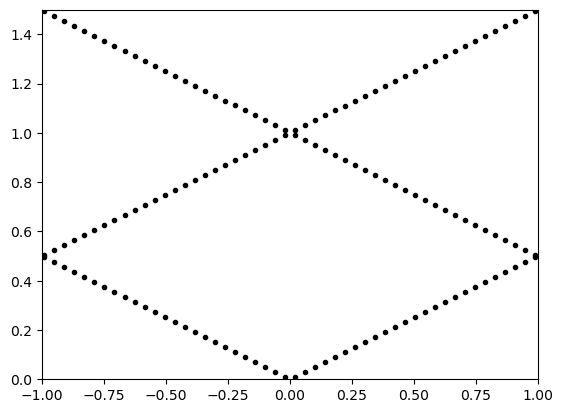

In [35]:
import matplotlib.pyplot as plt

for i in range(len(Ks)):
    plt.plot([Ks[i]] * len(dispe[i]), dispe[i],'.',color='black')
    plt.xlim([-1,1])
    plt.ylim([0,1.5])

## Campo Eléctrico

In [50]:
def Field(x):
    global a, numG, k, Vs, in1
    H = 0
    countt = 0
    for G in np.arange(-numG * 2 * np.pi / a, numG * 2 * np.pi / a + 0.0001, 2 * np.pi / a):
        countt += 1
        H += Vs[countt - 1, in1] * np.exp(1j * (k + G) * x)
    return H

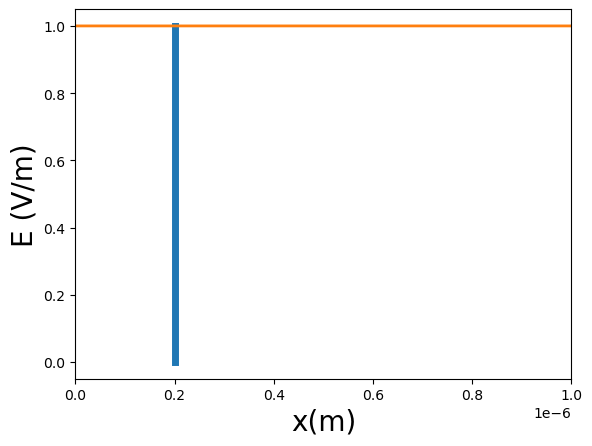

In [39]:
from scipy.linalg import eigh

def calculate_field(x, a, numG, k, Vs, in1):
    H = 0
    countt = 0
    for G in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
        countt += 1
        H += Vs[countt,in1]*np.exp(1j*(k+G)*x)
    return H

k = np.pi/(15*a)
in1 = 20

countG1 = 1
countG = 1
M1 = np.zeros((2*numG+1, 2*numG+1), dtype=complex)
g = np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a)
g1 = np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a)

for i in range(len(g1)):
    for j in range(len(g)):
        M1[i,j] = chi[i,j] * (k+g1[i]) * (k+g[j])


eigvals, eigvecs = eigh(M1)
ind = np.argsort(eigvals)
Ds = eigvals[ind]
Vs = eigvecs[:,ind]

freq = np.sqrt(abs(Ds[in1-1]))*a/2/np.pi

div = 15
div1 = 1500
x = np.linspace(0, a, div1+1)
FieldE = np.abs(calculate_field(x, a, numG, k, Vs, in1))**2

alt = np.max(np.abs(FieldE))
x1 = np.linspace(0, alt, div+1)
y1 = l1*np.ones(div+1)

plt.figure(2)
plt.plot(y1, x1, linewidth=5)
plt.plot(x, FieldE, linewidth=2)
plt.xlabel('x(m)', fontsize=20)
plt.ylabel('E (V/m)', fontsize=20)
#plt.ylim([0, alt])
plt.xlim([0, a])
plt.show()
